# 1. data 불러오기

주어진 데이터로 전복나이 예측하기

1. train.csv : 학습 데이터
  - id : 샘플 아이디
  - Gender : 전복 성별
  - Lenght : 전복 길이
  - Diameter : 전복 둘레
  - Height : 전복 키 
  - Whole : Weight : 전복 전체 무게
  - Shucked Weight : 껍질을 제외한 무게
  - Viscra Weight : 내장 무게
  - Shell Weight : 껍질 무게
  - Target : 전복 나이


2. test.csv : 테스트 데이터
  - id : 샘플 아이디
  - Gender : 전복 성별
  - Lenght : 전복 길이
  - Diameter : 전복 둘레
  - Height : 전복 키 
  - Whole : Weight : 전복 전체 무게
  - Shucked Weight : 껍질을 제외한 무게
  - Viscra Weight : 내장 무게
  - Shell Weight : 껍질 무게


3. sample_submissoin.csv : 제출 양식
  - id : 샘플 아이디
  - Target : 전복 나이

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Practice/data/dacon_data/abalone/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Practice/data/dacon_data/abalone/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Practice/data/dacon_data/abalone/sample_submission.csv')

# data 정보확인

In [3]:
train.tail()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
1248,1249,I,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
1249,1250,I,0.395,0.310,0.085,0.3170,0.1530,0.0505,0.0935,7
1250,1251,F,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7
1251,1252,F,0.445,0.335,0.110,0.4355,0.2025,0.1095,0.1195,6
1252,1253,F,0.750,0.550,0.195,1.8325,0.8300,0.3660,0.4400,11


In [4]:
0.0165 + 0.0065 + 0.015

0.038

In [5]:
# train data 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB


In [6]:
train = train.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.

In [7]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [8]:
# test data 확인
test.tail()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
2919,2920,I,0.170,0.105,0.035,0.0340,0.0120,0.0085,0.005
2920,2921,I,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.106
2921,2922,I,0.570,0.450,0.135,0.7940,0.3815,0.1415,0.245
2922,2923,I,0.460,0.350,0.120,0.4885,0.1930,0.1050,0.155
2923,2924,F,0.565,0.440,0.160,0.9150,0.3540,0.1935,0.320


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2924 non-null   int64  
 1   Gender          2924 non-null   object 
 2   Lenght          2924 non-null   float64
 3   Diameter        2924 non-null   float64
 4   Height          2924 non-null   float64
 5   Whole Weight    2924 non-null   float64
 6   Shucked Weight  2924 non-null   float64
 7   Viscra Weight   2924 non-null   float64
 8   Shell Weight    2924 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.7+ KB


In [10]:
test = test.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.

In [11]:
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [12]:
train.rename(columns = {"Lenght":"Length"}, inplace = True)
test.rename(columns = {"Lenght":"Length"}, inplace = True)

In [13]:
train.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Length, dtype: int64

In [14]:
# 데이터 상관관계 분석 [Target]
train.corrwith(train['Target']) # 명목형 변수(ex. 성별 0,1,2)는 상관관계 분석 X

Length            0.543789
Diameter          0.567933
Height            0.604654
Whole Weight      0.538404
Shucked Weight    0.420126
Viscra Weight     0.497283
Shell Weight      0.625819
Target            1.000000
dtype: float64

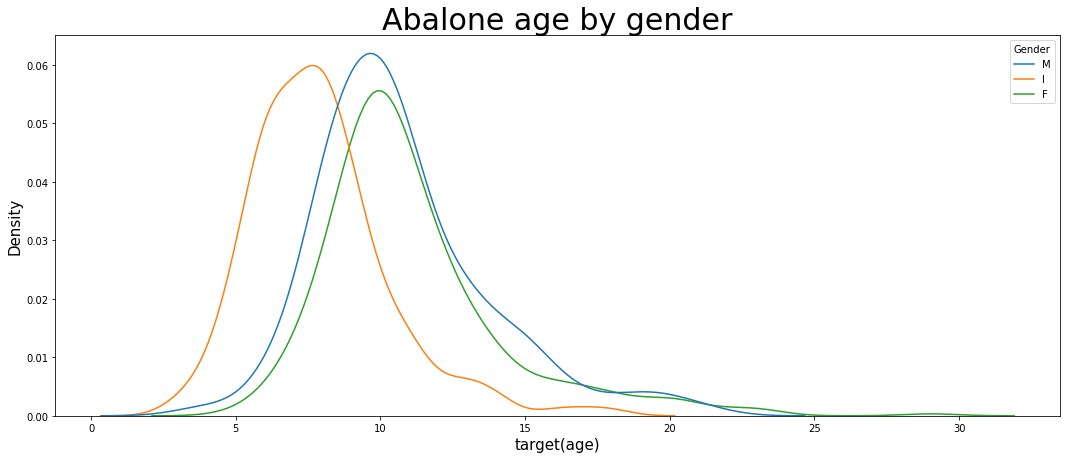

In [15]:
# 성별에 따른 나이 분포 그래프
plt.rcParams['figure.figsize'] = [18,7]
sns.kdeplot('Target', hue='Gender', data=train)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [16]:
train.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Length, dtype: int64

In [17]:
# train) M:0, F:1, I:2
gender_text = []
for i in train.Gender:
  if i =='M':
    train['M'] = 1
    train['F'] = 0
    train['I'] = 0
  elif i == 'F':
    train['M'] = 0
    train['F'] = 1
    train['I'] = 0
  else:
    train['M'] = 0
    train['F'] = 0
    train['I'] = 1
train = train.drop('Gender',axis = 1)
train.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,M,F,I
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0,1,0
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0,1,0
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0,1,0
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0,1,0
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0,1,0


In [18]:
# test) M:0, F:1, I:2
gender_text = []
for i in test.Gender:
  if i =='M':
    test['M'] = 1
    test['F'] = 0
    test['I'] = 0
  elif i == 'F':
    test['M'] = 0
    test['F'] = 1
    test['I'] = 0
  else:
    test['M'] = 0
    test['F'] = 0
    test['I'] = 1
test = test.drop('Gender',axis = 1)
test.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,M,F,I
0,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0,1,0
1,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0,1,0
2,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0,1,0
3,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0,1,0
4,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0,1,0


In [19]:
train.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,M,F,I
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.0,1253.0,1253.0
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211,0.0,1.0,0.0
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676,0.0,0.0,0.0
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000,0.0,1.0,0.0
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000,0.0,1.0,0.0
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000,0.0,1.0,0.0
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000,0.0,1.0,0.0
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000,0.0,1.0,0.0


Length


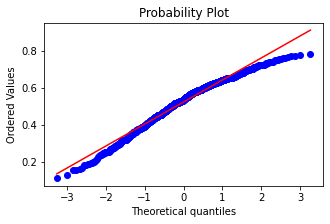


Diameter


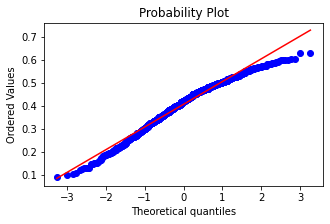


Height


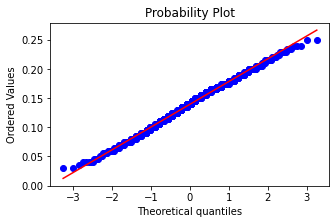


Whole Weight


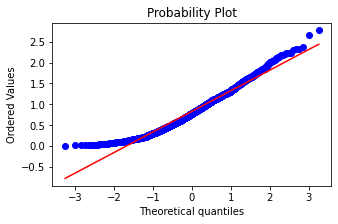


Shucked Weight


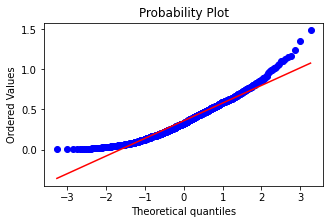


Viscra Weight


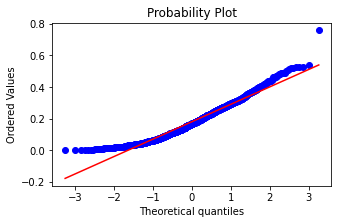


Shell Weight


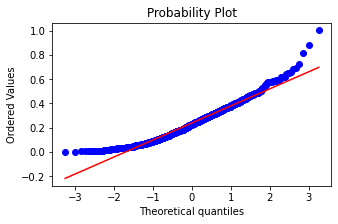


Target


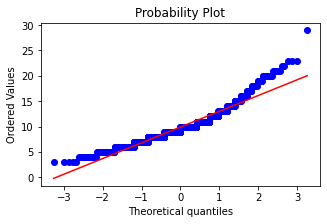

In [20]:
# QQ plot 그리기 (정규분포 확인)
import scipy.stats as stats

columns_list = train.columns
for i in columns_list:
  if i == 'M' or i == 'F' or i=='I':
    continue
  print(i)
  plt.figure(figsize = (5, 3))
  s = str(i)
  stats.probplot(train[s], dist = stats.norm, plot = plt)
  plt.show()
  plt.close()
  print()

#2. data 전처리

In [21]:
train.columns

Index(['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target', 'M', 'F', 'I'],
      dtype='object')

## 2-1 data 이상치 확인 및 처리(제거)

In [22]:
def outlier(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    data_lower_list = [data[(data < lower_bound)].index]
    data_upper_list = [data[(data > upper_bound)].index]
    return data_lower_list, data_upper_list, q1, q3

In [23]:
# outlier의 upper만 제거한 이유 : lower는 막 태어난 새끼일 가능성이 있음, upper는 나이에 상관없이 비정상적으로 큰게 있을 수 있음
for i in train.columns:
  if i == 'F' or i == 'M' or i == 'I' or i == 'Target':
    continue
  print('{}의 outlier_up_list를 제거합니다.'.format(i))
  _, outlier_up_list, _, _ = outlier(train[i])
  print('outlier_up_list: ',outlier_up_list)
  print()
  for j in outlier_up_list:
    train.drop(j,inplace=True)

Length의 outlier_up_list를 제거합니다.
outlier_up_list:  [Int64Index([], dtype='int64')]

Diameter의 outlier_up_list를 제거합니다.
outlier_up_list:  [Int64Index([], dtype='int64')]

Height의 outlier_up_list를 제거합니다.
outlier_up_list:  [Int64Index([241, 504], dtype='int64')]

Whole Weight의 outlier_up_list를 제거합니다.
outlier_up_list:  [Int64Index([17, 160, 312, 317, 511, 551, 844, 1064, 1081], dtype='int64')]

Shucked Weight의 outlier_up_list를 제거합니다.
outlier_up_list:  [Int64Index([373, 390, 576, 745, 797, 814, 954, 1142, 1181], dtype='int64')]

Viscra Weight의 outlier_up_list를 제거합니다.
outlier_up_list:  [Int64Index([219, 347, 809, 852], dtype='int64')]

Shell Weight의 outlier_up_list를 제거합니다.
outlier_up_list:  [Int64Index([486, 531, 571, 773, 897, 1084, 1108, 1141, 1172, 1223], dtype='int64')]



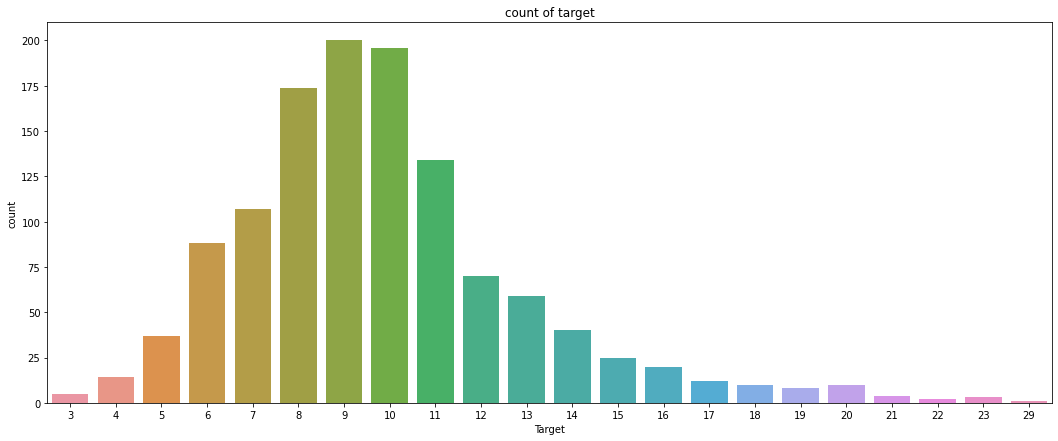

In [24]:
sns.countplot(x = 'Target', data = train)
plt.title('count of target')
plt.show()

In [25]:
# 전복의 수명 약 12년, 적당한 이상치 포함 -> 20을 넘는 것은 제거
data_target_upper_list = [train.Target[(train.Target > 20)].index]
for i in data_target_upper_list:
  train.drop(i, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 0 to 1252
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          1209 non-null   float64
 1   Diameter        1209 non-null   float64
 2   Height          1209 non-null   float64
 3   Whole Weight    1209 non-null   float64
 4   Shucked Weight  1209 non-null   float64
 5   Viscra Weight   1209 non-null   float64
 6   Shell Weight    1209 non-null   float64
 7   Target          1209 non-null   int64  
 8   M               1209 non-null   int64  
 9   F               1209 non-null   int64  
 10  I               1209 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 113.3 KB


## 2-2 왜곡치(skew)확인

In [26]:
# 왜곡치 (-2~2: 양호)
from scipy.stats import skew
for i in train.columns:# F, M, I 는 범주형 데이터
  if i == 'F' or i == 'M' or i =='I':
    continue
  print('{}:{}'.format(i,skew(train[i]))) 

Length:-0.6341501916009608
Diameter:-0.5848797302617205
Height:-0.20495519822541478
Whole Weight:0.3392554767119269
Shucked Weight:0.4454891611417155
Viscra Weight:0.4558823617527488
Shell Weight:0.3614063886003597
Target:0.844470389039657


# data 학습

In [27]:
# 데이터 수가 별로 없는 경우 가중치를 부여할 수 있다. over sampling
data_train_T=train['Target']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 10:
        target.append(1)
    elif data_train_T.iloc[i] < 15:
        target.append(2)
    else:
        target.append(3)
        
train["Range"] = target

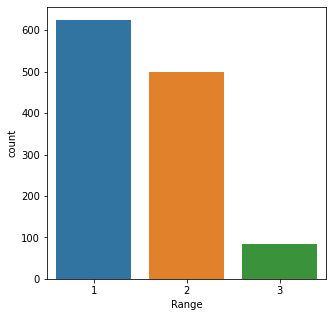

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x = train["Range"])

In [29]:
data_train_3 = train[train['Range']==3]

In [51]:
train = train.append(data_train_3)

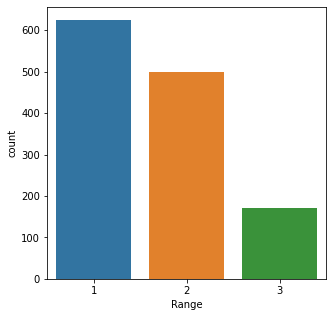

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x = train["Range"])

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1224
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          1294 non-null   float64
 1   Diameter        1294 non-null   float64
 2   Height          1294 non-null   float64
 3   Whole Weight    1294 non-null   float64
 4   Shucked Weight  1294 non-null   float64
 5   Viscra Weight   1294 non-null   float64
 6   Shell Weight    1294 non-null   float64
 7   Target          1294 non-null   int64  
 8   M               1294 non-null   int64  
 9   F               1294 non-null   int64  
 10  I               1294 non-null   int64  
 11  Range           1294 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 163.7 KB


In [55]:
data_train = train.copy()

In [56]:
data_test = test
data_test.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,M,F,I
0,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0,1,0
1,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0,1,0
2,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0,1,0
3,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0,1,0
4,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0,1,0


In [58]:
data_train = train.copy()
data_train.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,M,F,I,Range
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0,1,0,3
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0,1,0,1
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0,1,0,3
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0,1,0,2
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0,1,0,1


In [34]:
data_train_X = data_train.drop(columns = ['Target'], axis = 1)
data_train_X.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,M,F,I,Range
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,0,1,0,3
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,0,1,0,1
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,0,1,0,3
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,0,1,0,2
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,0,1,0,1


In [35]:
data_train_y = data_train['Target']
data_train_y.head()

0    15
1     8
2    18
3    13
4     6
Name: Target, dtype: int64

In [60]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

In [ ]:
!pip install catboost

In [ ]:
!pip install ngboost

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from ngboost import NGBRegressor


skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) #총 15번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']):
    n += 1
    
    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장
    
    train_X = np.array(data_train_X.drop("Range", axis = 1)) #분배된 학습을 위해 만들어둔 Range feature 제거
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    ### Create Model ###
    
    ###모델을 생성하고 집어넣으면 됩니다.
    
    ### MLPRegressor ###
    model = MLPRegressor(random_state = 42, activation = 'tanh')
    model.fit(X_train, y_train) # 모델 학습
    
    val_pred_name.append("MLPRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### NGBRegressor ###
    # model = NGBRegressor(random_state = 42, verbose = 0)
    # model.fit(X_train, y_train)
    
    # val_pred_name.append("NGBRegressor")      # 모델 이름 저장
    # val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    # target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### XGBRegressor ###
    model = XGBRegressor(random_state = 42,)
    model.fit(X_train, y_train)
    
    val_pred_name.append("XGBRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### CatBoostRegressor ###
    model = CatBoostRegressor(iterations = 1000, verbose = 0, task_type="GPU", random_state = 42)
    model.fit(X_train, y_train)
    
    val_pred_name.append("CatBoostRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### voting ###
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average NMAE %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:31:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 1 ==========
MLPRegressor model NMAE : 0.1630
XGBRegressor model NMAE : 0.1568
CatBoostRegressor model NMAE : 0.1545
Average NMAE 0.1518



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:31:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 2 ==========
MLPRegressor model NMAE : 0.1549
XGBRegressor model NMAE : 0.1385
CatBoostRegressor model NMAE : 0.1353
Average NMAE 0.1321



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 3 ==========
MLPRegressor model NMAE : 0.1551
XGBRegressor model NMAE : 0.1493
CatBoostRegressor model NMAE : 0.1565
Average NMAE 0.1487



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 4 ==========
MLPRegressor model NMAE : 0.1528
XGBRegressor model NMAE : 0.1575
CatBoostRegressor model NMAE : 0.1500
Average NMAE 0.1387



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 5 ==========
MLPRegressor model NMAE : 0.1679
XGBRegressor model NMAE : 0.1407
CatBoostRegressor model NMAE : 0.1410
Average NMAE 0.1389



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 6 ==========
MLPRegressor model NMAE : 0.1732
XGBRegressor model NMAE : 0.1525
CatBoostRegressor model NMAE : 0.1575
Average NMAE 0.1533



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 7 ==========
MLPRegressor model NMAE : 0.1620
XGBRegressor model NMAE : 0.1508
CatBoostRegressor model NMAE : 0.1598
Average NMAE 0.1468



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 8 ==========
MLPRegressor model NMAE : 0.1735
XGBRegressor model NMAE : 0.1344
CatBoostRegressor model NMAE : 0.1403
Average NMAE 0.1357



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 9 ==========
MLPRegressor model NMAE : 0.1555
XGBRegressor model NMAE : 0.1324
CatBoostRegressor model NMAE : 0.1330
Average NMAE 0.1188



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[16:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 10 ==========
MLPRegressor model NMAE : 0.1745
XGBRegressor model NMAE : 0.1499
CatBoostRegressor model NMAE : 0.1577
Average NMAE 0.1467



In [43]:
final_pred = np.array(fold_target_pred[0])
final_pred
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = final_pred.astype(int)

In [44]:
final_pred

array([ 9, 11,  5, ...,  9,  9, 11])

In [45]:
submission['Target'] = final_pred

In [46]:
submission.to_csv("Submit_test.csv",index=False)